## Detecting Phishing Websites using Neural Networks

The experiments conducted in this notebook intend to give an idea of how present day phishing website attackscan be prevented using machine learning.
To do this, we are going to use this [Phishing Websites' Dataset](https://archive.ics.uci.edu/ml/datasets/phishing+websites). 

We will start the experiments by importing the initial set of Python libraries.

In [1]:
# Filter the unnecessary warnings 
import warnings
warnings.filterwarnings("ignore")

# Import pandas, numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Dataset reading and display

In [2]:
data = pd.read_csv('Phishing.csv')
data.head(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


**Quick observation**: The dataset is loaded up with - 1, 0 and 1 values. Thus, we probably won't require any extravagant data scaling.

### Finding out the summary statistics from the dataset

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


### Finding out the basic information of the Features present in the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

### Inspection of null values in the dataset

In [5]:
data.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

### Feature Selection and Display

In [6]:
data.drop('Favicon', axis=1, inplace=True)
data.drop('port', axis=1, inplace=True)
data.drop('Iframe', axis=1, inplace=True)
data.drop('RightClick', axis=1, inplace=True)
data.drop('web_traffic', axis=1, inplace=True)
data.drop('Abnormal_URL', axis=1, inplace=True)
data.drop('on_mouseover', axis=1, inplace=True)
data.drop('Links_pointing_to_page', axis=1, inplace=True)

In [7]:
data.head(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,HTTPS_token,...,SFH,Submitting_to_email,Redirect,popUpWidnow,age_of_domain,DNSRecord,Page_Rank,Google_Index,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,1,-1,-1,-1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,-1,...,-1,1,0,1,-1,-1,-1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,-1,...,-1,-1,0,1,1,-1,-1,1,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,-1,...,-1,1,0,1,-1,-1,-1,1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,0,-1,-1,-1,-1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,-1,...,-1,-1,0,1,1,1,-1,1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,-1,-1,0,1,1,-1,-1,1,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,-1,...,-1,1,0,1,-1,-1,-1,1,1,-1
8,1,0,-1,1,1,-1,1,1,-1,-1,...,-1,1,0,1,1,-1,1,1,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,-1,1,0,1,1,-1,-1,1,1,-1


### Inspecting dataset dimensions and Features Included

In [8]:
# Dataset dimensions
data.shape

(11055, 23)

In [9]:
# Dataset parameters
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Redirect', 'popUpWidnow', 'age_of_domain',
       'DNSRecord', 'Page_Rank', 'Google_Index', 'Statistical_report',
       'Result'],
      dtype='object')

### Finding out the distribution of the Features and preparing an observational report

In [10]:
from collections import Counter

classes = Counter(data['Result'].values)
classes.most_common()

[(1, 6157), (-1, 4898)]

In [11]:
class_dist = pd.DataFrame(classes.most_common(), columns=['Class', 'Num_Observations'])
class_dist

,Class,Num_Observations
0,1,6157
1,-1,4898


### Preparing some basic visualizations for the distribution of the Features

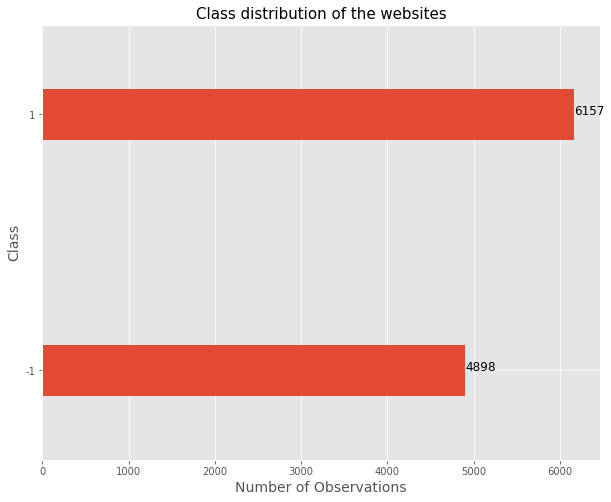

In [12]:
plt.style.use('ggplot')

subplot = class_dist.groupby('Class')['Num_Observations'].sum().plot(kind='barh', width=0.2, figsize=(10,8))

subplot.set_title('Class distribution of the websites', fontsize = 15)
subplot.set_xlabel('Number of Observations', fontsize = 14)
subplot.set_ylabel('Class', fontsize = 14)

for i in subplot.patches:
    subplot.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(i.get_width()), fontsize=12)

<AxesSubplot:xlabel='Result', ylabel='count'>

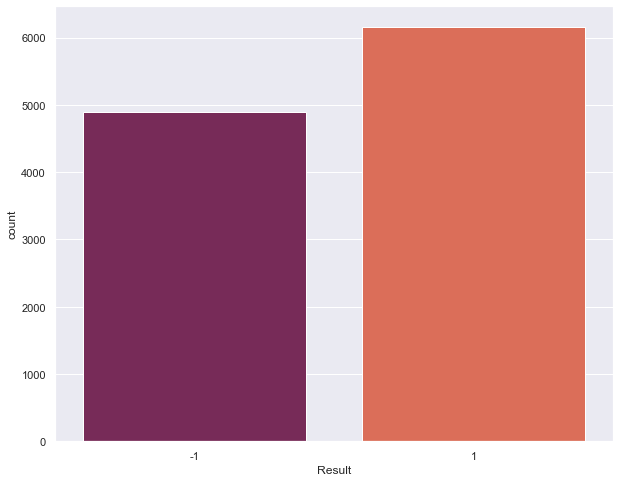

In [13]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x='Result', 
              data=data,
             palette='rocket')

<AxesSubplot:xlabel='URL_Length', ylabel='Shortining_Service'>

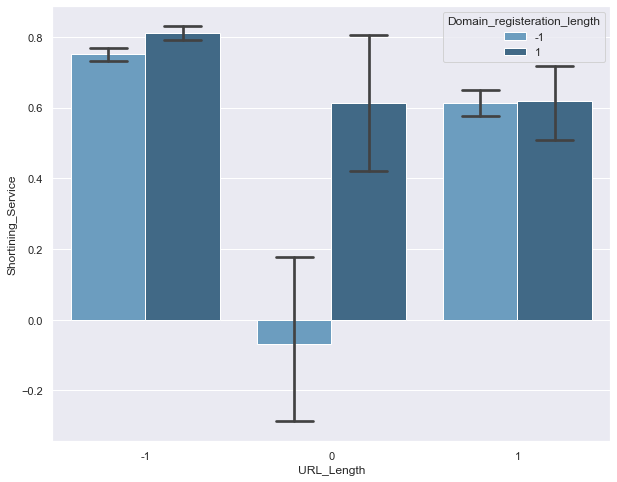

In [14]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x='URL_Length', 
            y='Shortining_Service', 
            data=data, 
            hue='Domain_registeration_length',
            capsize=.2,
            palette="Blues_d") 

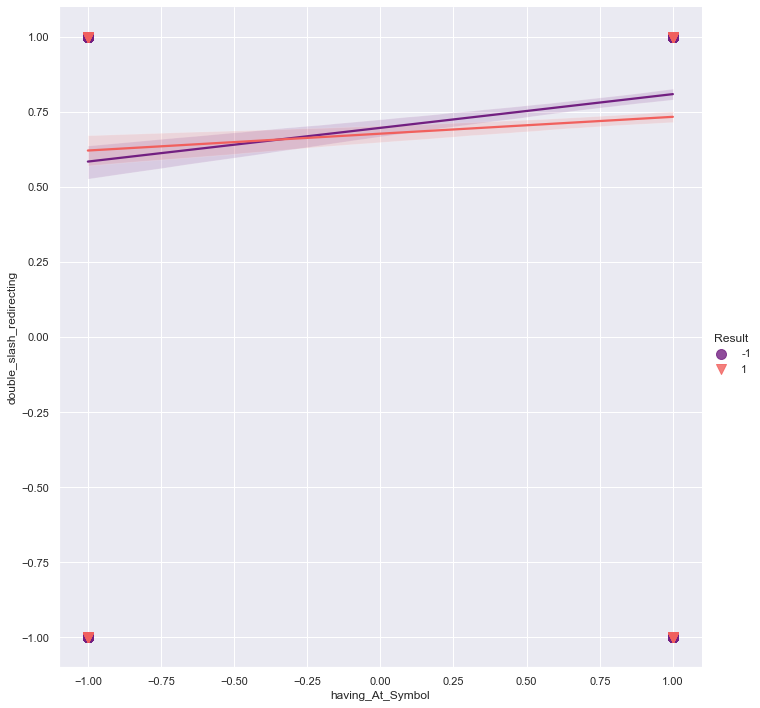

In [15]:
sns.set(rc={'figure.figsize':(10,8)})
sns.lmplot(x='having_At_Symbol', 
           y='double_slash_redirecting', 
           data=data, hue='Result', 
           markers=['o', 'v'], 
           scatter_kws={'s':100}, 
           size=10, 
           palette='magma')

<AxesSubplot:xlabel='Page_Rank', ylabel='Google_Index'>

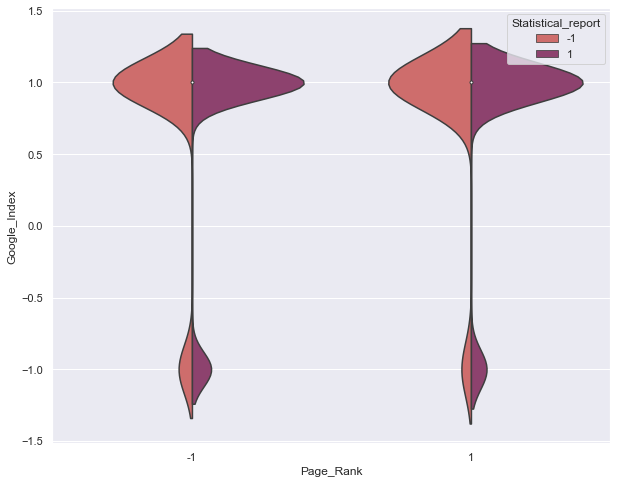

In [16]:
sns.set(rc={'figure.figsize':(10,8)})
sns.violinplot(x='Page_Rank', 
               y='Google_Index', 
               data=data, 
               hue='Statistical_report', 
               split=True, 
               palette='flare')

### Mapping the `-1` values to `0` in the Features

In [17]:
data.rename(columns={'Result': 'Class'}, inplace=True)

data['Class'] = data['Class'].map({-1:0, 1:1})
data['Class'].unique()

array([0, 1], dtype=int64)

### Data splitting

In [18]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,0:22].values.astype(int)
y = data.iloc[:,22].values.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=np.random.seed(7))

### Fitting the training data to the Logistic Regression classifier

The dataset contains every one of its Parameter values in - 1, 0, and 1. In this way, linear models like Logistic Regression are explicitly great at sorting out the connections between the features  of  the  dataset  which  only contain -1, 0 and 1 values.

In [19]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

### Model evaluation

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy score of the Logistic Regression classifier with default hyperparameter values {0:.2f}%'.format(accuracy_score(y_test, logreg.predict(X_test))*100.))
print('\n')
print('----Classification report of the Logistic Regression classifier with default hyperparameter value----')
print('\n')
print(classification_report(y_test, logreg.predict(X_test), target_names=['Phishing Websites', 'Normal Websites']))
print('----Confusion matrix of the Logistic Regression classifier with default hyperparameter value----')
print('\n')
print(confusion_matrix(y_test, logreg.predict(X_test)))

Accuracy score of the Logistic Regression classifier with default hyperparameter values 92.95%


----Classification report of the Logistic Regression classifier with default hyperparameter value----


                   precision    recall  f1-score   support

Phishing Websites       0.93      0.90      0.92      1467
  Normal Websites       0.93      0.95      0.94      1850

         accuracy                           0.93      3317
        macro avg       0.93      0.93      0.93      3317
     weighted avg       0.93      0.93      0.93      3317

----Confusion matrix of the Logistic Regression classifier with default hyperparameter value----


[[1327  140]
 [  94 1756]]


### Hyperparameter tuning with random searching

In [21]:
# Import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Define the grid of values
penalty = ['l1', 'l2']
C = [0.8, 0.9, 1.0]
tol = [0.01, 0.001 ,0.0001]
max_iter = [100, 150, 200, 250]

# Create a dictionary where tol and max_iter are keys and the lists of their values are the corresponding values
param_grid = dict(penalty=penalty, C=C, tol=tol, max_iter=max_iter)

In [22]:
# Instantiate RandomizedSearchCV with the required parameters
random_model = RandomizedSearchCV(estimator=logreg, param_distributions=param_grid, cv=5)

# Fit random_model to the data
random_model_result = random_model.fit(X_train, y_train)

# Summarize results
best_score, best_params = random_model_result.best_score_, random_model_result.best_params_
print("Best score: %.2f using %s" % (best_score*100., best_params))

Best score: 92.12 using {'tol': 0.01, 'penalty': 'l2', 'max_iter': 100, 'C': 0.9}


### Trying to improve the prediction performance with Neural Networks

In [23]:
# Imports
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import *

In [24]:
# Model building using the Sequential API
model = Sequential()

model.add(Dense(40, activation='relu',
          kernel_initializer='uniform',input_dim=X.shape[1]))
model.add(Dense(20, activation='relu',
          kernel_initializer='uniform'))
model.add(Dense(1,  activation='sigmoid', 
          kernel_initializer='uniform'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                920       
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________


### Defining an EarlyStopping callback, training the model and evaluating the model

In [26]:
from keras import callbacks

es_cb = callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=10)

In [27]:
history = model.fit(X_train, y_train, batch_size=64, epochs=128, verbose=1, callbacks=[es_cb])

scores = model.evaluate(X_test, y_test)
print('\nAccuracy score of the Neural Network with basic hyperparameter settings is {0:.2f}%'.format(scores[1]*100))

Epoch 1/128
121/121 [==============================] - 1s 1ms/step - loss: 0.4966 - accuracy: 0.8577
Epoch 2/128
121/121 [==============================] - 0s 2ms/step - loss: 0.2309 - accuracy: 0.9190
Epoch 3/128
121/121 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.9175
Epoch 4/128
121/121 [==============================] - 0s 1ms/step - loss: 0.2127 - accuracy: 0.9192
Epoch 5/128
121/121 [==============================] - 0s 1ms/step - loss: 0.2102 - accuracy: 0.9195
Epoch 6/128
121/121 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9200
Epoch 7/128
121/121 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9213
Epoch 8/128
121/121 [==============================] - 0s 1ms/step - loss: 0.2057 - accuracy: 0.9199
Epoch 9/128
121/121 [==============================] - 0s 1ms/step - loss: 0.2032 - accuracy: 0.9212
Epoch 10/128
121/121 [==============================] - 0s 1ms/step - loss: 0.1998 - accura

121/121 [==============================] - 0s 1ms/step - loss: 0.1145 - accuracy: 0.9528
Epoch 82/128
121/121 [==============================] - 0s 2ms/step - loss: 0.1111 - accuracy: 0.9522
Epoch 83/128
121/121 [==============================] - 0s 2ms/step - loss: 0.1101 - accuracy: 0.9539
Epoch 84/128
121/121 [==============================] - 0s 2ms/step - loss: 0.1076 - accuracy: 0.9564
Epoch 85/128
121/121 [==============================] - 0s 1ms/step - loss: 0.1108 - accuracy: 0.9514
Epoch 86/128
121/121 [==============================] - 0s 1ms/step - loss: 0.1107 - accuracy: 0.9524
Epoch 87/128
121/121 [==============================] - 0s 1ms/step - loss: 0.1134 - accuracy: 0.9521
Epoch 88/128
121/121 [==============================] - 0s 1ms/step - loss: 0.1098 - accuracy: 0.9550
Epoch 89/128
121/121 [==============================] - 0s 1ms/step - loss: 0.1082 - accuracy: 0.9548
Epoch 90/128
121/121 [==============================] - 0s 1ms/step - loss: 0.1058 - accuracy: 

###  Visualizing the performance of the Neural Network

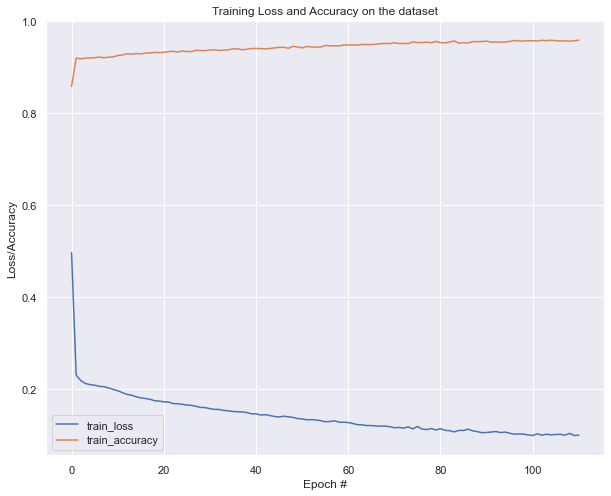

In [30]:
N = 111

plt.figure(figsize=(10,8))
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy")

plt.title("Training Loss and Accuracy on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")
plt.show()

### Model enhancement with TDLHBA hyperparameters and its performance visualization


TDLHBA (Tuning Deep Learning using Bat/Hybrid Bat Algorithm) is a technique that will involve hyperparameter tuning as introduced to check the performance improvement of the model.

In [31]:
# Building the model with the same topology as specified

model_TDLHBA = Sequential()

model_TDLHBA.add(Dense(40, activation='relu',
          kernel_initializer='uniform',input_dim=X.shape[1]))
model_TDLHBA.add(Dense(20, activation='relu',
          kernel_initializer='uniform'))
model_TDLHBA.add(Dense(1,  activation='sigmoid', 
          kernel_initializer='uniform'))

model_TDLHBA.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
history_TDLHBA = model_TDLHBA.fit(X_train, y_train, batch_size=10, epochs=100, verbose=1, callbacks=[es_cb])

scores = model_TDLHBA.evaluate(X_test, y_test)
print('\nAccuracy score of the Neural Network with TDLHBA hyperparameter settings is {0:.2f}%'.format(scores[1]*100))

Epoch 1/100
774/774 [==============================] - 1s 1ms/step - loss: 0.2805 - accuracy: 0.9015
Epoch 2/100
774/774 [==============================] - 1s 1ms/step - loss: 0.2079 - accuracy: 0.9186
Epoch 3/100
774/774 [==============================] - 1s 2ms/step - loss: 0.1975 - accuracy: 0.9208
Epoch 4/100
774/774 [==============================] - 1s 2ms/step - loss: 0.1872 - accuracy: 0.9228
Epoch 5/100
774/774 [==============================] - 1s 1ms/step - loss: 0.1791 - accuracy: 0.9270
Epoch 6/100
774/774 [==============================] - 1s 1ms/step - loss: 0.1702 - accuracy: 0.9331
Epoch 7/100
774/774 [==============================] - 1s 1ms/step - loss: 0.1661 - accuracy: 0.9334
Epoch 8/100
774/774 [==============================] - 1s 1ms/step - loss: 0.1595 - accuracy: 0.9338
Epoch 9/100
774/774 [==============================] - 1s 1ms/step - loss: 0.1544 - accuracy: 0.9350
Epoch 10/100
774/774 [==============================] - 1s 1ms/step - loss: 0.1502 - accura

774/774 [==============================] - 1s 1ms/step - loss: 0.0708 - accuracy: 0.9685
Epoch 82/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0722 - accuracy: 0.9699
Epoch 83/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0688 - accuracy: 0.9694
Epoch 84/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0726 - accuracy: 0.9676
Epoch 85/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0719 - accuracy: 0.9683
Epoch 86/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0704 - accuracy: 0.9685
Epoch 87/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0736 - accuracy: 0.9676
Epoch 88/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0705 - accuracy: 0.9698
Epoch 89/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0698 - accuracy: 0.9695
Epoch 90/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0717 - accuracy: 

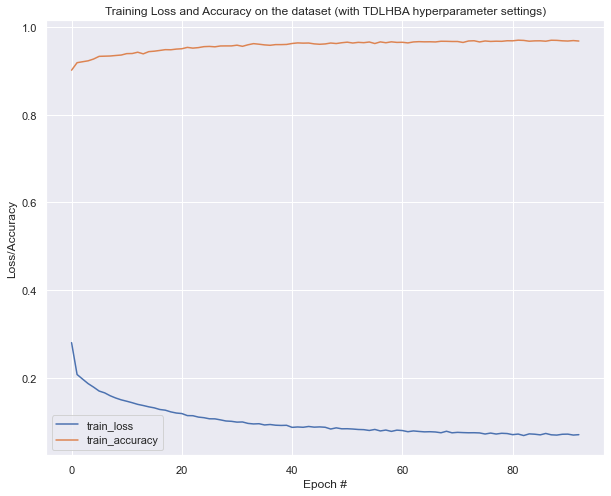

In [34]:
N = 93

plt.figure(figsize=(10,8))
plt.plot(np.arange(0, N), history_TDLHBA.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_TDLHBA.history["accuracy"], label="train_accuracy")

plt.title("Training Loss and Accuracy on the dataset (with TDLHBA hyperparameter settings)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")
plt.show()

Along these lines, in this notebook, we investigated how we can utilize machine learning and different data science techniques to detect phishing websites. As a future work, you can wrap the final model as a REST API endpoint and use it along with a website or browser extension.